# Import Libraries 

In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import stats

### Load data and inspect

In [156]:
df = pd.read_csv('job.csv')
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              21996 non-null  object 
 1   education            20004 non-null  object 
 2   experience           21996 non-null  object 
 3   industry             21995 non-null  object 
 4   jobdescription       21996 non-null  object 
 5   jobid                22000 non-null  int64  
 6   joblocation_address  21499 non-null  object 
 7   jobtitle             22000 non-null  object 
 8   numberofpositions    4464 non-null   float64
 9   payrate              21903 non-null  object 
 10  postdate             21977 non-null  object 
 11  site_name            3987 non-null   object 
 12  skills               21472 non-null  object 
 13  uniq_id              22000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.3+ MB


#### Clearly see that uniq_id, jobtitle, jobid this columns are filled with values but i need handle so many null values

In [158]:
df.describe()

,jobid,numberofpositions
count,2.200000e+04,4464.000000
mean,1.561171e+11,45.116935
std,9.423956e+10,186.197193
min,1.011600e+10,1.000000
25%,6.121650e+10,2.000000
50%,1.602169e+11,4.000000
75%,2.502166e+11,10.000000
max,3.112155e+11,2000.000000


#### Need to change the data type of jobid, that is numeric column here but it is an id need to change that 

In [159]:
df.nunique()

company                 8469
education               2355
experience               147
industry                  63
jobdescription         21063
jobid                  21910
joblocation_address     2329
jobtitle               17564
numberofpositions         84
payrate                 1848
postdate                4203
site_name                  1
skills                    45
uniq_id                22000
dtype: int64

##### Unique values count

In [160]:
df.isnull().sum()

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

##### Wow i think i need to handle some null values 

##### After doing data profile 

In [161]:
df.isnull().sum()

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

### Wow need to handle some null values 

In [162]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


### Cleaning, Imputation, Outliers

### 1. Fix datatypes

#### Fix:
1. experience
2. jobid
3. payrate
4. postdate

In [163]:
df["postdate"] = pd.to_datetime(df["postdate"], errors="coerce")

##### postdate change in to date type 

In [164]:
df["jobid"] = df["jobid"].astype(str)

##### jobid change to object or string 

#### The experience column contained non-numeric range values. Direct type casting fails on such formats, so preprocessing was required to extract numeric information before conversion.

In [165]:
# Clean experience text
df['experience'] = (
    df['experience']
    .astype(str)
    .str.lower()
    .str.replace('yrs', '', regex=False)
    .str.replace('yr', '', regex=False)
    .str.strip()
)

# Extract min & max temporarily
temp = df['experience'].str.extract(r'(\d+)\s*-\s*(\d+)')

# Convert to numeric
temp = temp.apply(pd.to_numeric, errors='coerce')

# If max is missing, assume same as min
temp[1] = temp[1].fillna(temp[0])

# Create only average experience
df['avg_exp'] = temp.mean(axis=1)

# (Optional) drop original experience column
df.drop(columns=['experience'], inplace=True)


##### Experience ranges were standardized and processed to derive a single average experience feature. Intermediate values were used only during transformation and excluded from the final dataset to maintain feature simplicity.

In [166]:
df['payrate'] = (
    df['payrate']
    .astype(str)
    .str.lower()
    .str.replace('p.a.', '', regex=False)
    .str.replace('p.a', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Extract salary range temporarily
temp = df['payrate'].str.extract(r'(\d+)\s*-\s*(\d+)')

# Convert to numeric
temp = temp.apply(pd.to_numeric, errors='coerce')

# If max missing, use min
temp[1] = temp[1].fillna(temp[0])

# Create only average salary
df['avg_pay'] = temp.mean(axis=1)

# Drop original payrate if not needed
df.drop(columns=['payrate'], inplace=True)


##### Salary ranges were processed to derive a single average salary feature. Intermediate values were used only for calculation and excluded from the final dataset to maintain a clean feature set.

In [167]:
df.head()

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,postdate,site_name,skills,uniq_id,avg_exp,avg_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,2016-05-21 19:30:00+00:00,NaN,ITES,43b19632647068535437c774b6ca6cf8,0.5,187500.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,2016-05-21 19:30:00+00:00,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,0.0,200000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,6.0,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,2016-10-13 16:20:55+00:00,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,13.0,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,7.0,NaN


### 2. Standardize categorical variables

In [168]:
df['company'] = df['company'].str.title()
df['company'] = df['company'].str.strip()
df['company'] = df['company'].str.replace(r'\s+', ' ', regex=True)

##### Standardized the company column by trimming extra spaces, normalizing text case, and fixing inconsistent spacing

In [169]:
df['education'] = df['education'].str.strip()
df['education'] = df['education'].str.title()
df['education'] = df['education'].str.replace(r'\s+', ' ', regex=True)
df['education'] = df['education'].str.replace(r'\.+$', '', regex=True)

##### Standardized the education column by trimming whitespace, normalizing text case, and fixing spacing inconsistencies

In [170]:
df['industry'] = (
    df['industry']
    .astype(str)
    .str.strip()
    .str.lower()
)


INDUSTRY_KEYWORDS = {
    'IT': [
        'it', 'software', 'technology', 'tech',
        'hardware', 'network', 'internet', 'ecommerce'
    ],

    'BFSI': [
        'bank', 'finance', 'financial', 'broking',
        'insurance', 'nbfc', 'investment'
    ],

    'Education': [
        'education', 'teaching', 'training',
        'school', 'college', 'university', 'edtech'
    ],

    'BPO': [
        'bpo', 'kpo', 'call centre', 'call center',
        'ites', 'outsourcing'
    ],

    'HR': [
        'recruitment', 'staffing', 'hr', 'human resource'
    ],

    'Healthcare': [
        'medical', 'healthcare', 'hospital',
        'pharma', 'biotech', 'clinical'
    ],

    'Oil & Gas': [
        'oil', 'gas', 'energy', 'power',
        'utilities', 'petroleum'
    ],

    'Telecom': [
        'telecom', 'telecommunication', 'networking'
    ],

    'Manufacturing': [
        'manufacturing', 'production', 'engineering',
        'industrial', 'factory', 'plant'
    ],

    'Metals & Mining': [
        'metal', 'mining', 'steel', 'cement'
    ],

    'Retail': [
        'retail', 'fmcg', 'foods', 'beverage',
        'wholesale', 'consumer'
    ],

    'Logistics': [
        'logistics', 'transport', 'warehouse',
        'shipping', 'courier', 'freight'
    ],

    'Media': [
        'media', 'advertising', 'entertainment',
        'broadcast', 'pr', 'event'
    ],

    'Hospitality': [
        'hotel', 'restaurant', 'hospitality',
        'travel', 'tourism'
    ],

    'Construction': [
        'construction', 'real estate',
        'property', 'infrastructure'
    ],

    'Government': [
        'government', 'defence', 'public sector', 'psu'
    ]
}


def extract_industry(text, mapping, default='Other'):
    for industry, keywords in mapping.items():
        if any(k in text for k in keywords):
            return industry
    return default

df['industry'] = df['industry'].apply(
    lambda x: extract_industry(x, INDUSTRY_KEYWORDS)
)


##### I standardized the industry column by applying rule-based keyword mapping to consolidate inconsistent industry labels into well-defined, high-level industry categories.

In [171]:
df['jobdescription'] = df['jobdescription'].str.strip()
df['jobdescription'] = (
    df['jobdescription']
    .str.replace(r'\s+', ' ', regex=True)
)
df['jobdescription'] = df['jobdescription'].str.strip()
df['jobdescription'] = df['jobdescription'].str.replace(r'[.,;:]+$', '', regex=True)

##### Standardized the jobdescription column by cleaning whitespace inconsistencies and normalizing text format without altering the original information.

In [172]:
df['jobid'] = df['jobid'].astype(str).str.strip()
df['jobid'] = df['jobid'].str.upper()
df['jobid'] = df['jobid'].str.replace(r'\s+', '', regex=True)

##### The jobid column was standardized by trimming whitespace, normalizing text casing, and removing spacing inconsistencies to ensure consistent and uniform job identifiers.

In [173]:
# ---------- STEP 0: Ensure column exists ----------
# Change 'location' if your column name is different
col = 'joblocation_address'

# ---------- STEP 1: Basic text cleaning ----------
df[col] = (
    df[col]
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

# ---------- STEP 2: Keep primary location only ----------
# Handles cases like "Mumbai / Navi Mumbai", "Chennai, Tamil Nadu"
df[col] = (
    df[col]
    .str.split(r'[/,|-]')
    .str[0]
    .str.strip()
)

# ---------- STEP 3: City mapping dictionary ----------
city_mapping = {
    'Bangalore': ['bengaluru', 'bangalore', 'banglore', 'bengluru'],
    'Mumbai': ['mumbai', 'bombay', 'navi mumbai'],
    'Chennai': ['chennai', 'madras'],
    'Hyderabad': ['hyderabad', 'hyd'],
    'Delhi': ['delhi', 'new delhi', 'ncr'],
    'Pune': ['pune', 'poona'],
    'Kolkata': ['kolkata', 'calcutta'],
    'Ahmedabad': ['ahmedabad', 'amdavad'],
    'Noida': ['noida'],
    'Gurgaon': ['gurgaon', 'gurugram'],
    'Faridabad': ['faridabad'],
    'Ghaziabad': ['ghaziabad'],
    'Jaipur': ['jaipur'],
    'Indore': ['indore'],
    'Bhopal': ['bhopal'],
    'Chandigarh': ['chandigarh'],
    'Coimbatore': ['coimbatore'],
    'Trivandrum': ['trivandrum', 'thiruvananthapuram'],
    'Kochi': ['kochi', 'cochin'],
    'Trichy': ['trichy', 'tiruchirappalli'],
    'Madurai': ['madurai'],
    'Salem': ['salem'],
    'Erode': ['erode'],
    'Vellore': ['vellore']
}

# ---------- STEP 4: Standardization function ----------
def standardize_location(value):
    for city, variants in city_mapping.items():
        if any(v in value for v in variants):
            return city
    return value.title()

# ---------- STEP 5: Apply standardization ----------
df[col] = df[col].apply(standardize_location)

df[col] = df[col].replace(
    ['Nan', 'None', 'Null', ''], np.nan
)

##### The location column contained inconsistent formatting, spelling variations, and multi-city entries. A rule-based standardization approach was applied to convert all values into canonical city names, significantly reducing cardinality and improving location-level analysis accuracy.

In [174]:
df['jobtitle'] = (
    df['jobtitle']
    .astype(str)
    .str.lower()
    .str.strip()
)


SENIORITY_KEYWORDS = {
    'Internship': ['intern', 'internship', 'trainee', 'apprentice'],
    'Entry level': ['junior', 'jr', 'fresher', 'entry level', 'graduate'],
    'Associate': ['associate', 'assistant', 'asst'],
    'Mid-Senior level': ['senior', 'sr', 'lead', 'principal', 'specialist', 'mid'],
    'Director': ['director', 'head', 'vp', 'vice president'],
    'Executive': [
        'executive', 'ceo', 'cto', 'cfo', 'coo',
        'founder', 'owner', 'partner'
    ]
}

def extract_seniority(title, mapping, default='Entry level'):
    for level, keywords in mapping.items():
        if any(k in title for k in keywords):
            return level
    return default

df['seniority'] = df['jobtitle'].apply(
    lambda x: extract_seniority(x, SENIORITY_KEYWORDS)
)

ROLE_KEYWORDS = {
    '.NET Developer': ['.net', 'dot net', 'dotnet'],
    'Java Developer': ['java'],
    'Python Developer': ['python'],
    'PHP Developer': ['php'],
    'React Developer': ['react'],
    'Angular Developer': ['angular'],
    'Node.js Developer': ['node'],
    'Android Developer': ['android'],
    'iOS Developer': ['ios'],

    'Software Engineer': ['software engineer', 'software developer'],

    'Data Scientist': ['data scientist'],
    'Data Analyst': ['data analyst', 'analyst'],

    'QA Engineer': ['qa', 'tester', 'testing'],
    'DevOps Engineer': ['devops'],
    'Cloud Engineer': ['aws', 'azure', 'cloud'],

    'Customer Support Executive': [
        'call', 'calling', 'caller', 'call center', 'callcentre',
        'voice', 'non voice', 'telecaller',
        'customer support', 'customer care', 'bpo'
    ],

    'Sales Executive': ['sales', 'business development', 'bdm'],
    'Marketing Executive': ['digital marketing', 'seo', 'marketing'],
    'HR Executive': ['hr', 'recruiter', 'recruitment'],
    'Accounts Executive': ['account', 'accounts', 'billing', 'tally'],

    'Admin Executive': [
        'admin', 'administration', 'office assistant',
        'back office', 'coordinator'
    ],

    'Operations Executive': ['operations', 'process executive'],

    'Civil Engineer': ['civil'],
    'Mechanical Engineer': ['mechanical'],
    'Electrical Engineer': ['electrical'],

    'Technician': ['technician', 'operator', 'helper'],
    'Delivery Executive': ['delivery', 'driver'],
    'Security Guard': ['security', 'guard'],
    'Warehouse Executive': ['warehouse', 'storekeeper', 'store'],

    'Engineer': ['engineer']
}

def extract_role(title, mapping):
    for role, keywords in mapping.items():
        if any(k in title for k in keywords):
            return role
    return title.title()

df['role'] = df['jobtitle'].apply(
    lambda x: extract_role(x, ROLE_KEYWORDS)
)


df.drop(columns=['jobtitle'], inplace=True)


##### I transformed the raw jobtitle column into two structured feature role and seniority using rule based keyword extraction and removed the original unstructured column to improve data quality.

In [175]:
df.head()

,company,education,industry,jobdescription,jobid,joblocation_address,numberofpositions,postdate,site_name,skills,uniq_id,avg_exp,avg_pay,seniority,role
0,Mm Media Pvt Ltd,Ug: B.Tech/B.E. - Any Specialization Pg:Any Po...,IT,Job Description Send me Jobs like this Qualifi...,210516002263,Chennai,NaN,2016-05-21 19:30:00+00:00,NaN,ITES,43b19632647068535437c774b6ca6cf8,0.5,187500.0,Entry level,Technician
1,Find Live Infotech,Ug: B.Tech/B.E. - Any Specialization Pg:Mba/Pg...,Media,Job Description Send me Jobs like this Qualifi...,210516002391,Chennai,60.0,2016-05-21 19:30:00+00:00,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,0.0,200000.0,Entry level,Work Based Onhome Based Part Time.
2,Softtech Career Infosystem Pvt. Ltd,Ug: Any Graduate - Any Specialization Pg:Any P...,IT,Job Description Send me Jobs like this - as a ...,101016900534,Bangalore,NaN,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,6.0,NaN,Entry level,Pl/Sql Developer - Sql
3,Onboard Hrservices Llp,Ug: Any Graduate - Any Specialization Pg:Ca Do...,BFSI,Job Description Send me Jobs like this - Invol...,81016900536,Mumbai,NaN,2016-10-13 16:20:55+00:00,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,13.0,NaN,Executive,Manager/Ad/Partner - Indirect Tax - Ca
4,Spire Technologies And Solutions Pvt. Ltd.,Ug: B.Tech/B.E. - Any Specialization Pg:Any Po...,IT,Job Description Send me Jobs like this Please ...,120916002122,Bangalore,4.0,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,7.0,NaN,Mid-Senior level,Java Developer


In [176]:
df['uniq_id'] = df['uniq_id'].astype(str)
df['uniq_id'] = df['uniq_id'].str.strip()
df['uniq_id'] = df['uniq_id'].str.upper()
df['uniq_id'] = df['uniq_id'].str.replace(r'\s+', '', regex=True)

##### The uniq_id column was standardized by cleaning whitespace and normalizing text casing to ensure consistent formatting of unique identifiers.

### 3. Handle missing values

In [177]:
df.isnull().sum()

company                    4
education               1996
industry                   0
jobdescription             4
jobid                      0
joblocation_address      502
numberofpositions      17536
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
avg_exp                  116
avg_pay                17062
seniority                  0
role                       0
dtype: int64

In [178]:
threshold = int(0.7 * df.shape[1])
df = df.dropna(thresh=threshold)

##### Rows with less than 70% non-null values were dropped to maintain data completeness.

In [179]:
df.isnull().sum()

company                    0
education               1992
industry                   0
jobdescription             0
jobid                      0
joblocation_address      498
numberofpositions      17532
postdate                  19
site_name              18009
skills                   524
uniq_id                    0
avg_exp                  112
avg_pay                17058
seniority                  0
role                       0
dtype: int64

In [180]:
df["joblocation_address"].fillna("Not Specified", inplace=True)

##### Missing values in the joblocation_address column were filled with the constant value Not Specified.This approach was chosen because location information may be unavailable for some job postings, but the absence itself does not invalidate the record.

In [181]:
df['skills'].fillna('Not Specified', inplace=True)
df['skills'] = (
    df['skills']
    .str.strip()                      
    .str.lower()                       
    .str.replace(r'\s+', ' ', regex=True)   
    .str.replace(r'\s*,\s*', ', ', regex=True)
)

##### Missing values in the skills column were handled prior to standardization to prevent NaN values from being converted into string literals during text processing. The column was then standardized by normalizing case, cleaning whitespace, and unifying separators.

In [182]:
df.isnull().sum()

company                    0
education               1992
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
numberofpositions      17532
postdate                  19
site_name              18009
skills                     0
uniq_id                    0
avg_exp                  112
avg_pay                17058
seniority                  0
role                       0
dtype: int64

In [183]:
df['education'].fillna('Not Specified', inplace=True)

##### Missing values in the education column were filled with "Not Specified" to preserve records where educational details were not provided.

In [184]:
df['numberofpositions'].fillna(1, inplace=True)

##### Missing values in the numberofpositions column were filled with 1 This decision was based on the business assumption that a job posting implies at least one open position.

In [185]:
df.drop(columns=['site_name'], inplace=True)

##### Dropped the site_name column because it contained a constant value and did not add meaningful information to the analysis.

In [186]:
df = df.sort_values(["company", "postdate"])
df["postdate"] = df.groupby("company")["postdate"].ffill()
df["postdate"] = df.groupby("company")["postdate"].bfill()

##### Missing values in the postdate column were handled using a grouped forward-fill and backward-fill strategy The data was first sorted by company and post date to maintain chronological order Missing dates were then filled within each company group, ensuring that date values were not propagated across different companies.

In [187]:
df.isnull().sum()

company                    0
education                  0
industry                   0
jobdescription             0
jobid                      0
joblocation_address        0
numberofpositions          0
postdate                   4
skills                     0
uniq_id                    0
avg_exp                  112
avg_pay                17058
seniority                  0
role                       0
dtype: int64

In [34]:
df = df.dropna(subset=['postdate'])

##### Rows with missing postdate values that could not be imputed were removed, as posting date is a critical temporal attribute for analysis.

In [189]:
df[df['avg_exp'].isna()]['seniority'].value_counts()
seniority_avg = df.groupby('seniority')['avg_exp'].mean()
df['avg_exp'] = df['avg_exp'].fillna(
    df['seniority'].map(seniority_avg)
)

##### Missing values in the avg_exp column were imputed using seniority-wise average experience for each seniority level, missing experience values were filled using the average experience calculated from available records within the same seniority group this ensures consistency between job seniority and estimated experience levels.

In [191]:
df['exp_bucket'] = pd.cut(
    df['avg_exp'],
    bins=[0, 1, 3, 6, 10, 20, 40],
    labels=['0-1', '1-3', '3-6', '6-10', '10-20', '20+']
)


lvl1_mean = (
    df.groupby(['industry', 'seniority', 'exp_bucket'], observed=True)['avg_pay']
    .transform('mean')
)

df['avg_pay'] = df['avg_pay'].fillna(lvl1_mean)


lvl2_mean = (
    df.groupby(['industry', 'seniority'], observed=True)['avg_pay']
    .transform('mean')
)

df['avg_pay'] = df['avg_pay'].fillna(lvl2_mean)


lvl3_mean = (
    df.groupby('industry', observed=True)['avg_pay']
    .transform('mean')
)

df['avg_pay'] = df['avg_pay'].fillna(lvl3_mean)


df.drop(columns=['exp_bucket'], inplace=True)


##### Missing values in the avg_pay column were imputed using a hierarchical, context-aware approach salary values were first estimated using industry, seniority, and experience-level averages, followed by industry-and-seniority and industry-level averages as fallback strategies group-wise transform was used to ensure proper index alignment and prevent data leakage across groups.

In [192]:
df.isnull().sum()

company                0
education              0
industry               0
jobdescription         0
jobid                  0
joblocation_address    0
numberofpositions      0
postdate               4
skills                 0
uniq_id                0
avg_exp                0
avg_pay                0
seniority              0
role                   0
dtype: int64

In [148]:
df.head()

,company,education,industry,jobdescription,jobid,joblocation_address,numberofpositions,postdate,site_name,skills,uniq_id,avg_exp,avg_pay,seniority,role
5430,10Kinfo,Ug: B.Tech/B.E. Pg:M.Tech Doctorate:Any Doctor...,IT,Job Description Send me Jobs like this Job Des...,240915500768,Bangalore,1.0,2016-01-29 14:07:03+00:00,NaN,it software - application programming,958A7155683B5A0924417970C58759DA,7.5,1.191878e+06,Mid-Senior level,Tools Lead
6663,10Kinfo,Ug: Bca Pg:Mca Doctorate:Any Doctorate - Any S...,IT,Job Description Send me Jobs like this Account...,250915500173,Bangalore,1.0,2016-01-29 14:07:48+00:00,NaN,it software - ecommerce,9461A8DA77E83B120737701094FE0EBE,6.5,1.036641e+06,Entry level,Marketing Executive
19598,18Th Technology,Ug: B.A Pg:Post Graduation Not Required Doctor...,IT,Job Description Send me Jobs like this Job Res...,160915500972,Noida,1.0,2015-11-22 22:18:25+00:00,NaN,journalism,D4C5B88321BCAAC7863C5C7793400867,1.5,3.180192e+05,Entry level,Content Writer
19636,18Th Technology,Ug: B.Tech/B.E. Pg:Mca Doctorate:Any Doctorate...,IT,Job Description Send me Jobs like this Candida...,160915501010,Noida,1.0,2015-11-22 22:18:26+00:00,NaN,it software - ecommerce,B87BDB5C5CF4C922BCA6F0FBA138659B,4.5,3.260000e+05,Executive,Admin Executive
19778,18Th Technology,Ug: Any Graduate Pg:Mba/Pgdm Doctorate:Any Doc...,IT,Job Description Send me Jobs like this Job Res...,160915500998,Noida,1.0,2015-11-22 22:18:31+00:00,NaN,sales,7782E62EA35633DA33EDD4C75240852F,3.5,3.260000e+05,Executive,Sales Executive


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21996 entries, 5430 to 14492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   company              21996 non-null  object             
 1   education            21996 non-null  object             
 2   industry             21996 non-null  object             
 3   jobdescription       21996 non-null  object             
 4   jobid                21996 non-null  object             
 5   joblocation_address  21996 non-null  object             
 6   numberofpositions    21996 non-null  float64            
 7   postdate             21992 non-null  datetime64[ns, UTC]
 8   skills               21996 non-null  object             
 9   uniq_id              21996 non-null  object             
 10  avg_exp              21996 non-null  float64            
 11  avg_pay              21996 non-null  float64            
 12  seniority           

In [194]:
df['avg_pay'].head()

5430     1.191878e+06
6663     1.036641e+06
19598    3.180192e+05
19636    3.260000e+05
19778    3.260000e+05
Name: avg_pay, dtype: float64

In [195]:
df['avg_pay'] = df['avg_pay'].astype(int)

##### The avg_pay column was converted from float to integer using .astype(int) to remove decimal values and ensure salary figures are stored as whole numbers for analysis.

In [196]:
df['avg_pay'].head()

5430     1191878
6663     1036640
19598     318019
19636     326000
19778     326000
Name: avg_pay, dtype: int64

#### Outlier detection

In [197]:
# =====================================================
# Smart capping using NON-OUTLIER min & max (group-wise)
# Column: avg_pay
# Grouped by: industry + seniority
# =====================================================

import pandas as pd

df_cap = df.dropna(subset=['avg_pay', 'industry', 'seniority']).copy()

def smart_cap(group):
    Q1 = group['avg_pay'].quantile(0.25)
    Q3 = group['avg_pay'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify NON-outliers
    non_outliers = group[
        (group['avg_pay'] >= lower_bound) &
        (group['avg_pay'] <= upper_bound)
    ]

    # If all values are outliers (edge case), return group as-is
    if non_outliers.empty:
        return group

    min_valid = non_outliers['avg_pay'].min()
    max_valid = non_outliers['avg_pay'].max()

    # Apply smart capping
    group['avg_pay'] = group['avg_pay'].apply(
        lambda x: min_valid if x < lower_bound
        else max_valid if x > upper_bound
        else x
    )

    return group

# Apply group-wise smart capping
df_smart_capped = (
    df_cap
    .groupby(['industry', 'seniority'], group_keys=False)
    .apply(smart_cap, include_groups=False)
)

##### Outlier detection was performed using the IQR method because the numerical variables exhibited skewed distributions. This method is robust to extreme values and is suitable for business-oriented datasets.
##### Salary outliers were handled using a group-wise smart capping strategy. Instead of IQR limits, lower outliers were capped to the minimum non-outlier salary and upper outliers to the maximum non-outlier salary within each industry and seniority group. This preserves realistic salary values while controlling extreme influence.

In [198]:
df.head()

,company,education,industry,jobdescription,jobid,joblocation_address,numberofpositions,postdate,skills,uniq_id,avg_exp,avg_pay,seniority,role
5430,10Kinfo,Ug: B.Tech/B.E. Pg:M.Tech Doctorate:Any Doctor...,IT,Job Description Send me Jobs like this Job Des...,240915500768,Bangalore,1.0,2016-01-29 14:07:03+00:00,it software - application programming,958A7155683B5A0924417970C58759DA,7.5,1191878,Mid-Senior level,Tools Lead
6663,10Kinfo,Ug: Bca Pg:Mca Doctorate:Any Doctorate - Any S...,IT,Job Description Send me Jobs like this Account...,250915500173,Bangalore,1.0,2016-01-29 14:07:48+00:00,it software - ecommerce,9461A8DA77E83B120737701094FE0EBE,6.5,1036640,Entry level,Marketing Executive
19598,18Th Technology,Ug: B.A Pg:Post Graduation Not Required Doctor...,IT,Job Description Send me Jobs like this Job Res...,160915500972,Noida,1.0,2015-11-22 22:18:25+00:00,journalism,D4C5B88321BCAAC7863C5C7793400867,1.5,318019,Entry level,Content Writer
19636,18Th Technology,Ug: B.Tech/B.E. Pg:Mca Doctorate:Any Doctorate...,IT,Job Description Send me Jobs like this Candida...,160915501010,Noida,1.0,2015-11-22 22:18:26+00:00,it software - ecommerce,B87BDB5C5CF4C922BCA6F0FBA138659B,4.5,326000,Executive,Admin Executive
19778,18Th Technology,Ug: Any Graduate Pg:Mba/Pgdm Doctorate:Any Doc...,IT,Job Description Send me Jobs like this Job Res...,160915500998,Noida,1.0,2015-11-22 22:18:31+00:00,sales,7782E62EA35633DA33EDD4C75240852F,3.5,326000,Executive,Sales Executive


In [199]:
df.to_csv(r"C:\Users\DELL\OneDrive\Desktop\project\EDA job\cleaned_day2.csv")

## Univariate & Bivariate EDA

In [200]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\project\EDA job\cleaned_day2.csv")

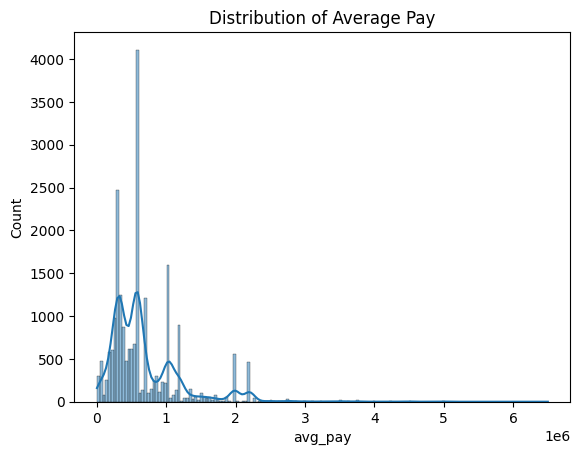

In [201]:
plt.figure()
sns.histplot(df['avg_pay'], kde=True)
plt.title("Distribution of Average Pay")
plt.show()

### Insights

The distribution of average pay is right skewed, showing that most jobs fall in the lower to mid salary range, while a small number of high paying roles increase the tail on the right, likely due to senior or specialized positions.

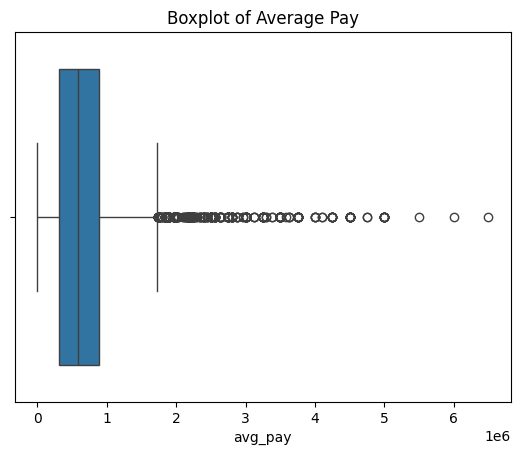

In [202]:
plt.figure()
sns.boxplot(x=df['avg_pay'])
plt.title("Boxplot of Average Pay")
plt.show()

### Insights

The boxplot reveals the presence of high-end outliers in average pay. These outliers likely correspond to senior-level or niche roles and represent valid business cases rather than data errors.

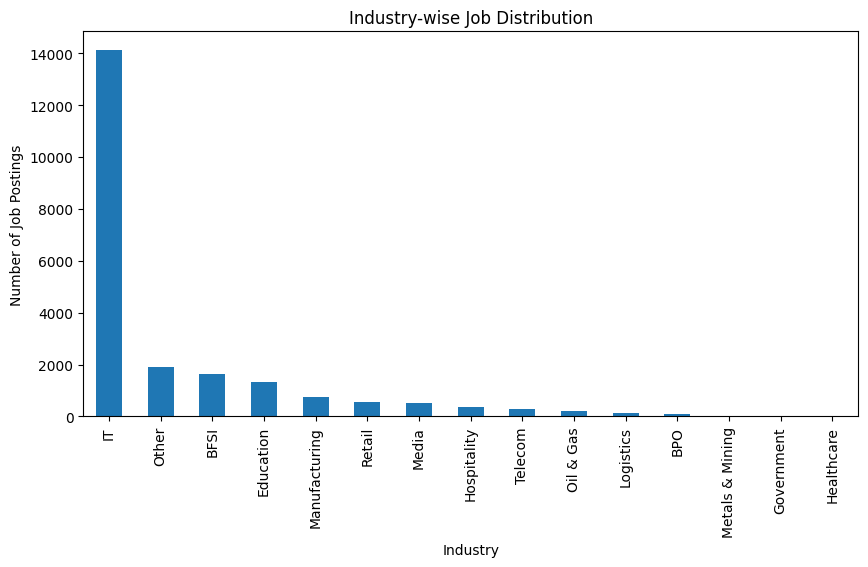

In [203]:
plt.figure(figsize=(10,5))
df['industry'].value_counts().plot(kind='bar')
plt.title("Industry-wise Job Distribution")
plt.xlabel("Industry")
plt.ylabel("Number of Job Postings")
plt.show()

### Insights

The IT industry has the highest number of job postings, indicating strong demand for technology-related roles. Other industries show comparatively lower job counts, suggesting uneven hiring distribution across sectors.

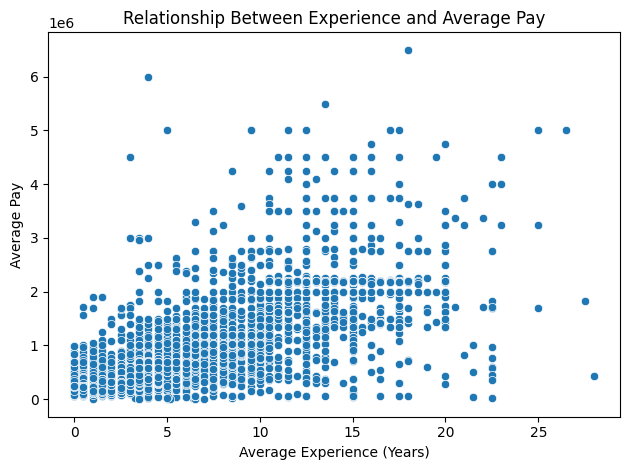

In [204]:
plt.figure()

sns.scatterplot(
    x='avg_exp',
    y='avg_pay',
    data=df
)

plt.title("Relationship Between Experience and Average Pay")
plt.xlabel("Average Experience (Years)")
plt.ylabel("Average Pay")
plt.tight_layout()
plt.show()


### Insight

The scatter plot shows a positive relationship between experience and average pay. As experience increases, salary generally increases, although the spread widens at higher experience levels, indicating that pay is also influenced by role and industry.

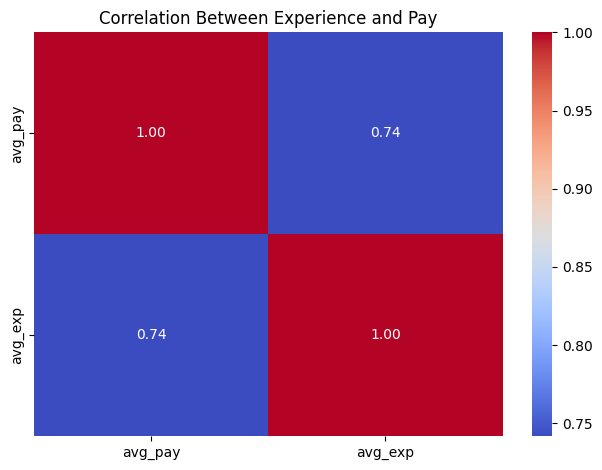

In [205]:
plt.figure()

corr = df[['avg_pay', 'avg_exp']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Between Experience and Pay")
plt.tight_layout()
plt.show()


##### The heatmap shows a moderate positive correlation between average experience and average pay, confirming that experience is an important factor in salary determination, but not the only influencing variable.

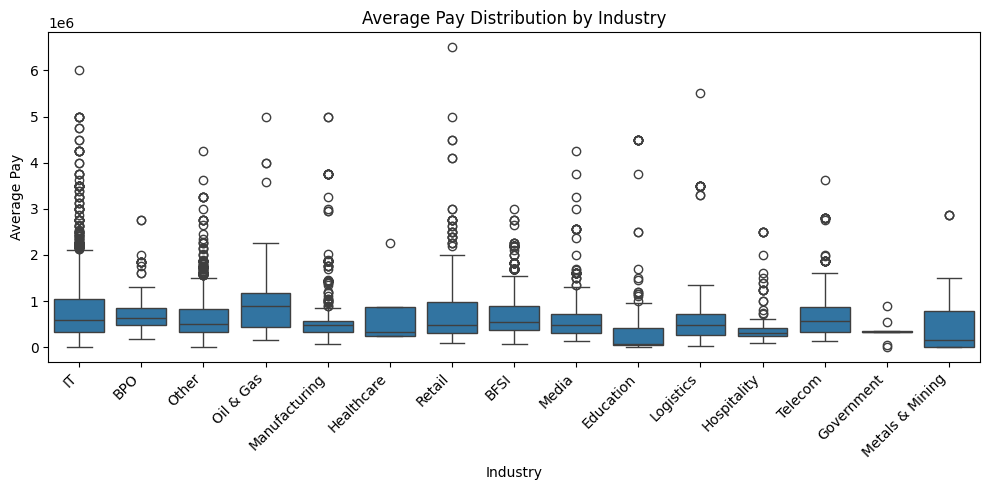

In [206]:
plt.figure(figsize=(10,5))

sns.boxplot(
    x='industry',
    y='avg_pay',
    data=df
)

plt.title("Average Pay Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Average Pay")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insight

Salary distributions vary significantly across industries. The IT industry shows a higher median pay and a wider spread, indicating greater earning potential and role diversity compared to other industries.

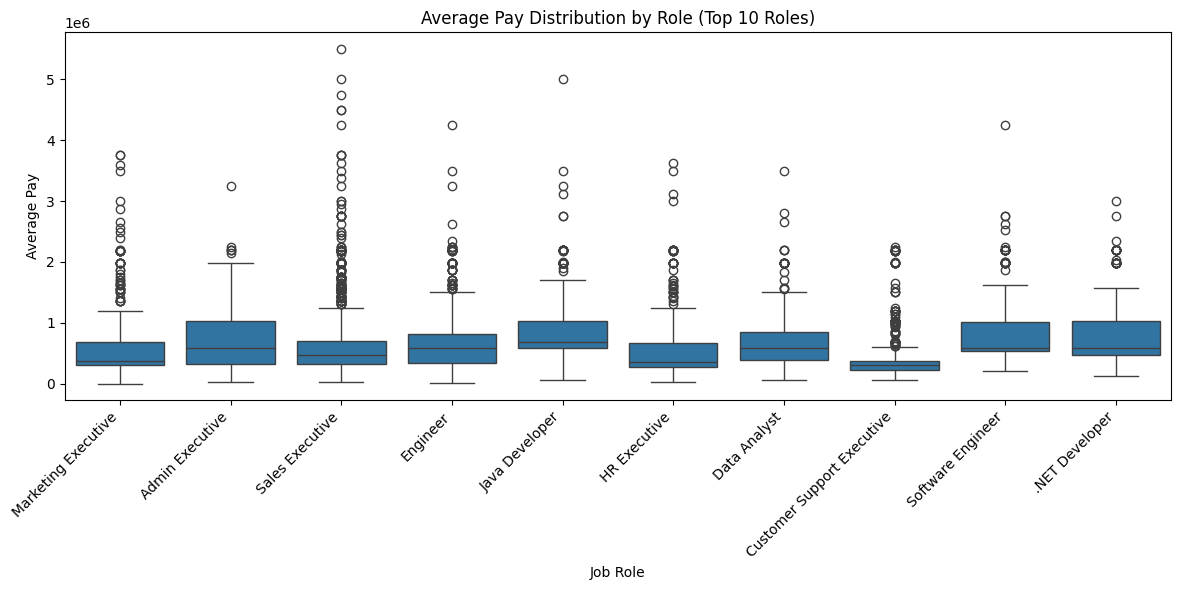

In [207]:
# select top 10 roles by count
top_roles = df['role'].value_counts().head(10).index

df_top_roles = df[df['role'].isin(top_roles)]

plt.figure(figsize=(12,6))

sns.boxplot(
    x='role',
    y='avg_pay',
    data=df_top_roles
)

plt.title("Average Pay Distribution by Role (Top 10 Roles)")
plt.xlabel("Job Role")
plt.ylabel("Average Pay")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insight

Salary varies significantly across job roles. Specialized technical roles show higher median pay and wider salary ranges, while generic or entry-level roles tend to have lower and more consistent pay distributions.

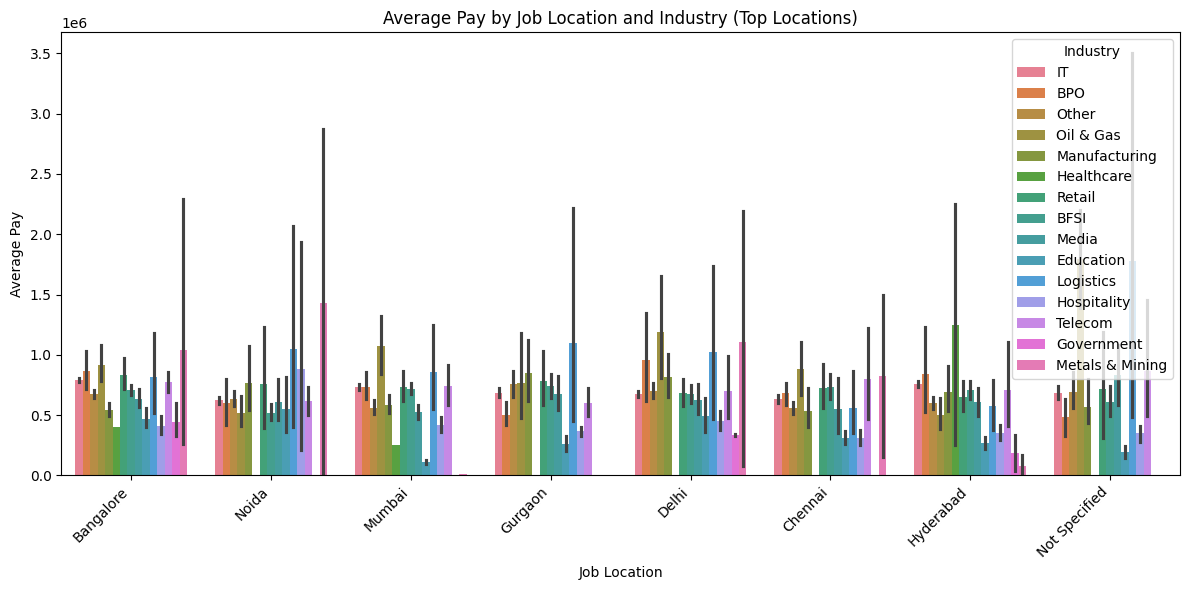

In [210]:
# take top 8 job locations by number of postings
top_locations = df['joblocation_address'].value_counts().head(8).index

# filter dataset
df_loc = df[df['joblocation_address'].isin(top_locations)]

plt.figure(figsize=(12,6))

sns.barplot(
    x='joblocation_address',
    y='avg_pay',
    hue='industry',
    data=df_loc,
    estimator='mean'
)

plt.title("Average Pay by Job Location and Industry (Top Locations)")
plt.xlabel("Job Location")
plt.ylabel("Average Pay")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Industry")
plt.tight_layout()
plt.show()


### Insight

The segment analysis shows clear salary differences across job locations. Metro and technology-focused locations offer higher average pay compared to other regions. Within the same location, the IT industry consistently provides higher compensation, highlighting the combined impact of geography and industry on salary levels.

### Overall Insights from EDA:

Salary distribution is right-skewed, indicating a higher concentration of low to mid-paying roles with fewer high-paying positions.

Experience shows a positive relationship with salary, but higher experience levels also show greater salary variation.

The IT industry dominates job postings and consistently offers higher average pay compared to other industries.

Salary varies significantly by job role, with specialized technical roles commanding higher compensation.

Geographic location plays a key role in salary determination, as metro and tech-hub locations offer higher pay across industries.

Segment analysis confirms that salary is influenced by a combination of industry, role, experience, and location, rather than a single factor.

### Statistical Tests + Time EDA + Feature Engineering

In [211]:
from scipy.stats import ttest_ind

# split the data into IT and Non-IT groups
it_pay = df[df['industry'] == 'IT']['avg_pay']
non_it_pay = df[df['industry'] != 'IT']['avg_pay']

# perform independent t-test
t_stat, p_value = ttest_ind(
    it_pay,
    non_it_pay,
    nan_policy='omit'
)

# print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# decision based on significance level
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the Null Hypothesis (Significant difference in pay)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant difference in pay)")

T-statistic: 18.31922307265258
P-value: 2.0802217063504573e-74
Result: Reject the Null Hypothesis (Significant difference in pay)


##### The t-test evaluates whether the mean salary differs between IT and Non-IT roles A p-value below 0.05 indicates a statistically significant difference, suggesting that industry type has a meaningful impact on average pay.

In [212]:
from scipy.stats import f_oneway

# collect avg_pay for each industry
industry_groups = [
    group['avg_pay'].dropna().values
    for name, group in df.groupby('industry')
    if len(group) > 1
]

# perform one-way ANOVA
f_stat, p_value = f_oneway(*industry_groups)

# print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# decision
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the Null Hypothesis (Significant pay differences across industries)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant pay differences across industries)")


F-statistic: 89.90445180143834
P-value: 1.045984964313294e-252
Result: Reject the Null Hypothesis (Significant pay differences across industries)


##### ANOVA tests whether average salary differs across industries a p-value below 0.05 indicates that at least one industry has a significantly different average pay compared to others.

In [213]:
from scipy.stats import chi2_contingency

# create contingency table
contingency_table = pd.crosstab(
    df['industry'],
    df['seniority']
)

print("Contingency Table:\n")
print(contingency_table)

# perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# decision
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the Null Hypothesis (Industry and seniority are associated)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No association found)")


Contingency Table:

seniority        Associate  Director  Entry level  Executive  Internship  \
industry                                                                   
BFSI                   196        95          927         96          12   
BPO                     10         4           59          5           2   
Education              525        21          652         52          13   
Government               3         0           12          3           0   
Healthcare               0         1            3          0           0   
Hospitality             49         5          194         73          10   
IT                     542       269         9388        947         228   
Logistics               10         4           64         23           1   
Manufacturing           66        18          490         79          11   
Media                   40        25          291         78          12   
Metals & Mining          5         2           11          1        

##### The Chi-square test evaluates whether industry and seniority level are independent a p-value below 0.05 indicates a significant association, meaning seniority distribution varies across industries.

In [220]:
df['postdate'] = pd.to_datetime(df['postdate'], errors='coerce')

df['month'] = df['postdate'].dt.month

df[['postdate', 'month']].head()


,postdate,month
0,2016-01-29 14:07:03+00:00,1.0
1,2016-01-29 14:07:48+00:00,1.0
2,2015-11-22 22:18:25+00:00,11.0
3,2015-11-22 22:18:26+00:00,11.0
4,2015-11-22 22:18:31+00:00,11.0


### Insight

Extracting month allows us to analyze hiring trends over time and identify seasonal or long-term patterns in job postings.

month
1.0     2141
2.0      714
3.0     3694
4.0      919
5.0     2995
6.0       33
8.0      891
9.0       54
10.0    2318
11.0    4224
12.0    4009
dtype: int64


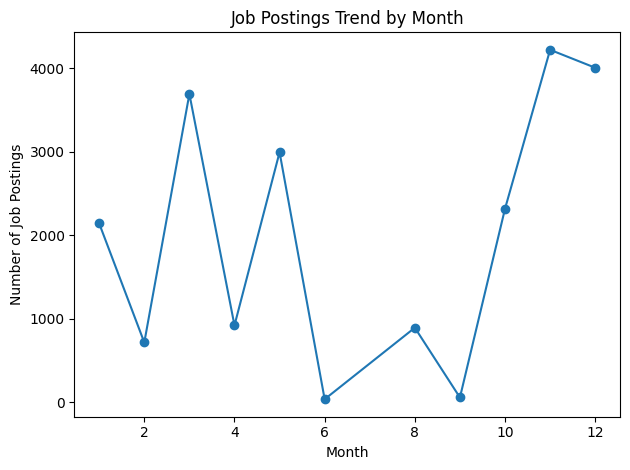

In [218]:
monthly_trend = df.groupby('month').size()

print(monthly_trend)

plt.figure()
monthly_trend.plot(kind='line', marker='o')
plt.title("Job Postings Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()


##### Monthly trends help identify seasonal hiring patterns. Peaks may correspond to hiring cycles, while dips may reflect slower recruitment periods.

In [221]:
df['salary_band'] = pd.qcut(
    df['avg_pay'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

df[['avg_pay', 'salary_band']].head()

,avg_pay,salary_band
0,1191878,Very High
1,1036640,Very High
2,318019,Low
3,326000,Medium
4,326000,Medium


##### Helps compare roles and industries using relative salary groups instead of raw values.

In [227]:
metro_cities = [
    'bangalore', 'bengaluru', 'chennai',
    'mumbai', 'pune', 'hyderabad',
    'delhi', 'gurgaon', 'noida'
]

df['is_metro'] = df['joblocation_address'].str.lower().apply(
    lambda x: 'Metro' if any(city in x for city in metro_cities) else 'Non-Metro'
)

df[['joblocation_address', 'is_metro']].head()

,joblocation_address,is_metro
0,Bangalore,Metro
1,Bangalore,Metro
2,Noida,Metro
3,Noida,Metro
4,Noida,Metro


##### Captures geographic salary differences in a simplified, business-friendly way.

In [ ]:
d